<div class="alert alert-block bg-primary">
<center>MÉTODOS NUMÉRICOS</center>
<center>LISTA 05</center>
<center>ALUNA: MARIA LUÍZA TEIXEIRA NASCIMENTO</center>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.optimize as opt
import math

<div class="alert alert-block alert-info">
<center>
<strong>Questão 01:</strong> Implemente os algoritmos da iteração de ponto fixo, Newton-Raphson e secante usando somente
a biblioteca Numpy.
</center>
</div>

<center class="alert alert-block alert-info">Algoritmo da iteração de <strong>Ponto Fixo</strong></center>

In [2]:
def f(x): # AQUI FICARÁ A FUNÇÃO CORRESPONDENTE A F(X)
    return 2*(x**3) - 11.7*(x**2) + 17.7*x - 5

def g(x): # AQUI FICÁRA A FUNÇÃO CORRESPONDENTE A G(X)
    return 5/(2*(x**2) - 11.7*x + 17.7)

<CENTER>A função de f(x) e g(x) <strong>variam</strong> dependendo da função usada.</CENTER>

<center>A fins de exemplo podemos ter o nosso $f(x) = 2x^3 - 11.7x^2 + 17.7x - 5$</center>
<center>E o nosso $g(x)= \frac{5}{2x^2 - 11.7x + 17.7}$</center>

In [3]:
def metodoPontoFixo(x0, iteracoes): #x0 (APROXIMAÇÃO INICIAL) e ITERAÇÕES (NUM DE ITERAÇÕES)
    contador, x1 = 0, 0
    while (contador < iteracoes):
        x1 = g(x0)
        x0 = x1
        contador += 1
    print("A RAÍZ encontada foi X = ", x1)
    print("                 F(X) = ", f(x1))

In [4]:
metodoPontoFixo(3, 3)

A RAÍZ encontada foi X =  0.2989664134622428
                 F(X) =  -0.7006074193431964


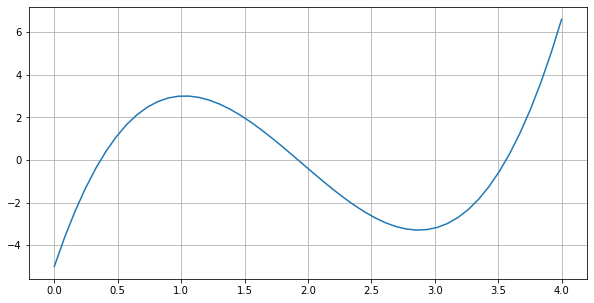

In [5]:
x = np.linspace(0, 4, 50)
plt.figure(figsize = (10,5))
plt.plot(x, f(x))
plt.grid()

<center>A partir da implementação do método de Ponto Fixo, definindo o nosso <strong>$f(x)$</strong> e <strong>$g(x)$</strong> (a mão, dependendo das funções que usamos) com o valor inicial de 3 e com 3 tentativas, esses os dados significam que quando o nosso valor da raiz (x) for "0.2989664134622428" ele resulta em um $f(0.2989664134622428) = -0.7006074193431964$. O que é visível no gráfico.<center>

In [6]:
#opt.fixed_point(f, x0 = 3, xtol=1e-6) #Aqui usa tolerância, no método implementado usa a quantidade de iterações.

<center class="alert alert-block alert-info">Algoritmo de <strong>Newton-Raphson</strong></center>

In [7]:
def funcao_original(x): # AQUI FICARÁ A FUNÇÃO CORRESPONDENTE A F(X)
    return 2*(x**3) - 11.7*(x**2) + 17.7*x - 5

def funcao_derivada(x): # AQUI FICÁRA A FUNÇÃO CORRESPONDENTE A F'(X)
    return 6*(x**2) - 23.4*x + 17.7

In [8]:
def metodoNewtonRaphson(x0, iteracoes): #x0 (APROXIMAÇÃO INICIAL) e ITERAÇÕES (NUM DE ITERAÇÕES)
    contador, x1 = 0, 0
    while (contador < iteracoes):
        x1 = x0 - (funcao_original(x0)/ funcao_derivada(x0))
        x0 = x1
        contador += 1
    print("A RAÍZ encontada foi X = ", x1)
    print("                 F(X) = ", funcao_original(x1))

In [9]:
metodoNewtonRaphson(3, 3)

A RAÍZ encontada foi X =  3.7929344806432264
                 F(X) =  2.947603115432983


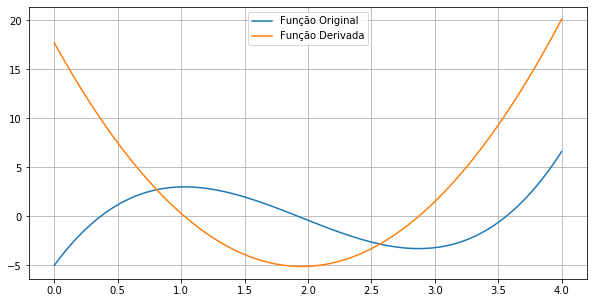

In [10]:
x = np.linspace(0, 4, 100)
plt.figure(figsize = (10,5))
plt.plot(x, funcao_original(x), label="Função Original")
plt.plot(x, funcao_derivada(x), label="Função Derivada")
plt.legend()
plt.grid()

<center>A fins de exemplo podemos ter o nosso funcao_original(x)$ = 2x^3 - 11.7x^2 + 17.7x - 5$</center>
<center>A fins de exemplo podemos ter o nosso funcao_derivada(x)$ = 6x^2 - 23.4x^ + 17.7$</center>

<center>Podemos observar que a linha correspondente a "Função Orginal (Azul)" ele toca no 0 três vezes, a primeira no intervalo provável de [0,0.5] a segunda [1.5,2] e a terceira [3.5,4], como damos o nosso ponto de partida como sendo 3 ele procurará a raíz que está no nosso terceiro intervalo. E assim com o o valor de $x = 3.7929344806432264$ obtemos o nosso $F(X)= 2.947603115432983$ com o número de iterações iguais a 3. Se tivessemos mais iterações poderiamos nos aproximar mais.</center>
<center>A partir do opt (optimize) podemos chegar em um valor muito aproximado como mostrado abaixo.</center>

In [11]:
opt.root_scalar(funcao_original, fprime=funcao_derivada, x0=3, method='newton')

      converged: True
           flag: 'converged'
 function_calls: 16
     iterations: 8
           root: 3.5631608248620537

<center class="alert alert-block alert-info">Algoritmo de <strong>Secante</strong></center>

In [12]:
def metodoSecante(x_zero, x_um, iteracoes): 
    contador = 0
    while (contador < iteracoes):
        #x_dois = (x_zero * f(x_um) - x_um * f(x_zero)) / (f(x_um) - f(x_zero)) # Forma que estava na video aula semestre passado
        x_dois = x_um - (f(x_um)*(x_zero - x_um))/(f(x_zero) - f(x_um))         # O que estava na apostila 
        x_zero = x_um
        x_um = x_dois
        contador += 1
    print("A RAÍZ encontada foi X =", x_dois)
    print("                 F(X) =", f(x_dois))

In [13]:
metodoSecante(3,4,3) #Anterior 

A RAÍZ encontada foi X = 3.586275384711736
                 F(X) = 0.2478694601312128


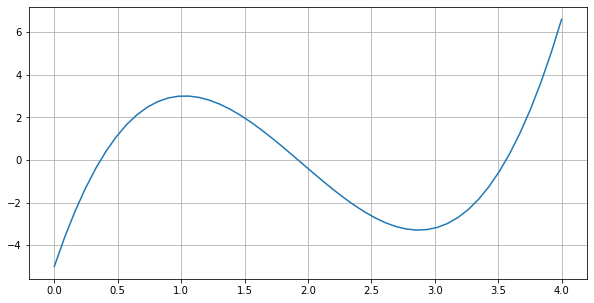

In [14]:
x = np.linspace(0, 4, 50)
plt.figure(figsize = (10,5))
plt.plot(x, f(x), label="Função Original")
plt.grid()

<center>Seguindo a mesma lógica das demais implementações temos o método da Secante, que utiliza 1 parâmetro a mais; Sendo ele o $x_{-1}$, utilizando o mesmo exemplo dos casos anteriores vimos uma aproximação da raíz para o valor $x = 3.586275384711736$ referindo ao 3 intervalo [3.5, 4] que a raíz está localizada.</center>
<center>Utilizando o opt obtemos algo muito proximo do que foi implementado.</center>

In [15]:
opt.root_scalar(f, x0 = 4, x1 = 3, maxiter = 3, method = "secant")

      converged: False
           flag: 'convergence error'
 function_calls: 5
     iterations: 3
           root: 3.5862753847117346

<div class="alert alert-block alert-info">
<center>
<strong>Questão 02:</strong> Use a iteração de ponto fixo simples para localizar a raiz de $f(x)=2sin(\sqrt{x})-x$, tendo $x_0=0.5$ e adotando como critério de para do erro $e_a<=0,001$%:
</center>
</div>

In [16]:
def f(x):
    return 2*(np.sin(x**0.5) - x)

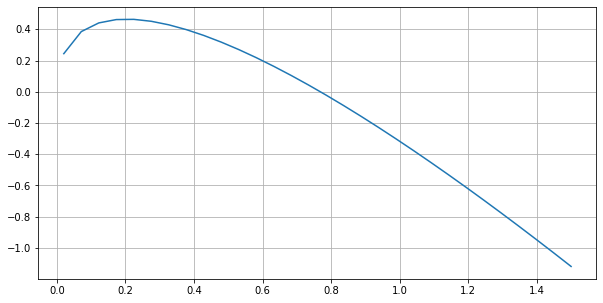

In [17]:
x = np.linspace(-1, 1.5, 50)
plt.figure(figsize = (10,5))
plt.plot(x, f(x))
plt.grid()

In [18]:
opt.fixed_point(f, x0 = 0.5, xtol = 1e-3)

array(0.38963723)

<center>A partir do método de ponto fixo simples do opt (optimize) da biblioteca scipy, adotoando como $x_0 =0.5$ e tolerância de ${1}*10^{(-3)}$. Temos a raiz o valor $0.38963723$</center>

<div class="alert alert-block alert-info">
<center>
<strong>Questão 03:</strong> Determine a maior raiz real de $f(x) = 2x^3 - 11.7x^2 + 17.7x - 5$:
</center>
</div>

In [19]:
funcao_f = lambda x: 2*x**3 - 11.7*x**2 + 17.7*x - 5
funcao_g = lambda x:  5/(2*(x**2) - 11.7*x + 17.7)
f_derivada = lambda x: 6*x**2 - 23.4*x + 17.7

<center class="alert alert-block alert-info"><strong>Graficamente</strong></center>

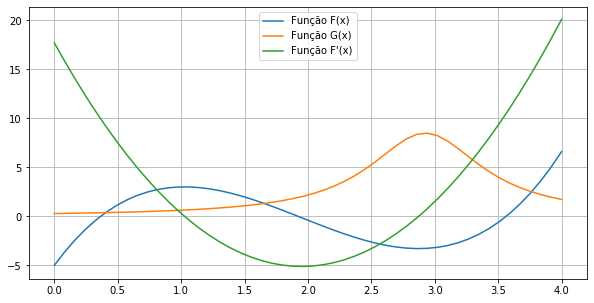

In [20]:
x = np.linspace(0, 4, 50)
plt.figure(figsize = (10,5))
plt.plot(x, funcao_f(x), label = "Função F(x)")
plt.plot(x, funcao_g(x), label = "Função G(x)")
plt.plot(x, f_derivada(x), label = "Função F'(x)")
plt.legend()
plt.grid()

<center>Temos as nossas raízes como algo dentro do intervalo [0,0.5], dentro do intervalo [1.5,2.0] e por fim no intervalo [3.5,4]</center>

<center class="alert alert-block alert-info"><strong>Pelo método da iteração de ponto fixo (três iterações,x0=3)</strong></center>

In [21]:
metodoPontoFixo(3, 3)

A RAÍZ encontada foi X =  0.2989664134622428
                 F(X) =  0.4419429089825023


<center>É o exemplo mostrado na questão 01 com o método ponto fixo, com explicações localizadas acima.</center>

<center class="alert alert-block alert-info"><strong>Pelo método de Newton-Raphson (três iterações,x0=3)</strong></center>

In [22]:
metodoNewtonRaphson(3, 3)

A RAÍZ encontada foi X =  3.7929344806432264
                 F(X) =  2.947603115432983


<center>É o exemplo mostrado na questão 01 com o método Newton-Raphson, com explicações localizadas acima.</center>

<center class="alert alert-block alert-info"><strong>Pelo método da secante (três iterações,x−1=3,x0=4)</strong></center>

In [23]:
metodoSecante(3,4,3)

A RAÍZ encontada foi X = 0.778535281274724
                 F(X) = -0.012606947560868331


<center>É o exemplo mostrado na questão 01 com o método da Secante, com explicações localizadas acima.</center>

<div class="alert alert-block alert-info">
<center>
<strong>Questão 04:</strong> Compare os métodos da Bisseção, Falsa posição, Ponto fixo, Newton-Raphson e Secante, localizando a raiz das seguintes equações:
</center>
</div>

In [24]:
def metodoFalsaPosicao(f, a, b, ERRO=1e-1): # Valor default de ERRO
    df = pd.DataFrame([],columns=['a','b','x','Erro'])
    erro, x_ant = 1, a
    while(erro>ERRO):
        inf = np.sign(f(a))
        sup = np.sign(f(b))
        if ((inf*sup)!=-1):
            return print("Não existe raíz no intervalo {} e {}".format(a,b))
        else:
            x = a - (f(a) * (b - a) / (f(b) - f(a)))
            df.loc[len(df)] = [a, b, x, erro]
            if (f(x)==0):
                return print("A raíz é {}".format(x))
            elif (inf*np.sign(f(x))==-1):
                b = x
            else:
                a = x
        erro = np.abs(x-x_ant)/np.abs(x) 
        x_ant = x
    return x, df

<center class="alert alert-block alert-info"><strong>$f_1 = 2x^4 + 4x^3 + 3x^2 - 10x - 15, com $ $x^*$ pertencente $[0,3]$</strong></center>

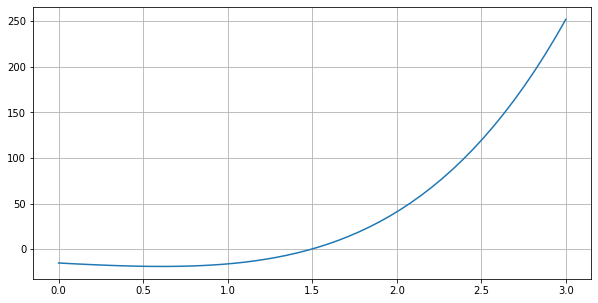

In [25]:
funcao_original = lambda x: 2*(x**4) + 4*(x**3) + 3*(x**2) - 10*x - 15
funcao_g = lambda x: 15/(8*x**3 + 12*x**2 - 10)
funcao_derivada = lambda x: 8*x**3 + 12*x**2 +6*x - 10

x0 = 0
x1 = 3

plt.figure(figsize = (10,5))
x = np.linspace(0, 3, 50)
plt.plot(x, funcao_original(x))
plt.grid()

In [26]:
%timeit opt.root_scalar(funcao_original, x0 = 0, x1 = 3, method = "secant");
opt.root_scalar(funcao_original, x0 = 0, x1 = 3, method = "secant")

429 µs ± 19.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: -1.3003841326439196

In [27]:
%timeit opt.root_scalar(funcao_original, bracket = [0, 3], method = "bisect");
opt.root_scalar(funcao_original, bracket = [0, 3], method = "bisect")

59.6 µs ± 2.77 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 43
     iterations: 41
           root: 1.4928787086632838

In [28]:
%timeit opt.root_scalar(funcao_original, fprime = funcao_derivada, x0 = 0, x1 = 3, method = "newton");
opt.root_scalar(funcao_original, fprime = funcao_derivada, x0 = 0, x1 = 3, method = "newton")

243 µs ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 6
           root: -1.3003841326439198

In [29]:
metodoFalsaPosicao(funcao_original, 0, 3)

(1.211133291339204,           a    b         x      Erro
 0  0.000000  3.0  0.168539  1.000000
 1  0.168539  3.0  0.343325  1.000000
 2  0.343325  3.0  0.519426  0.509097
 3  0.519426  3.0  0.690603  0.339029
 4  0.690603  3.0  0.850159  0.247866
 5  0.850159  3.0  0.992222  0.187678
 6  0.992222  3.0  1.112954  0.143177
 7  1.112954  3.0  1.211133  0.108479)

In [30]:
opt.fixed_point(funcao_g, x0 = 0)

array(-1.5)

<center class="alert alert-block alert-info"><strong>$f_2 = (x+3)(x+1){(x-3)}^3, com $ $x^*$ pertencente $[0,5]$</strong></center>

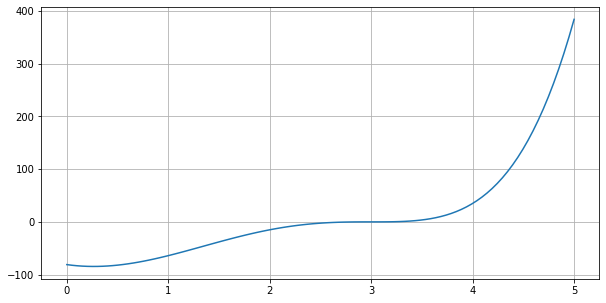

In [31]:
funcao_original = lambda x: (x+3)*(x+1)*((x-3)**3)
funcao_g = lambda x: (-x**4 + 9*x**2 - 12)/4
funcao_derivada = lambda x: 4*(x**3) - 18*x + 4

x0 = 0
x1 = 5

plt.figure(figsize = (10,5))
x = np.linspace(0, 5, 100)
plt.plot(x, funcao_original(x))
plt.grid()

In [32]:
%timeit opt.root_scalar(funcao_original, x0 = 0, x1 = 5, method = "secant");
opt.root_scalar(funcao_original, x0 = 0, x1 = 5, method = "secant")

1.98 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: False
           flag: 'convergence error'
 function_calls: 52
     iterations: 50
           root: 2.999998804764436

In [33]:
%timeit opt.root_scalar(funcao_original, bracket = [0, 5], method = "bisect");
opt.root_scalar(funcao_original, bracket = [0, 5], method = "bisect")

52.1 µs ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 44
     iterations: 42
           root: 3.000000000000682

In [34]:
#%timeit opt.fixed_point(funcao_g, x0 = -5);
#opt.fixed_point(funcao_g, x0 = -5)

<center> Apresenta uma mensagem: <strong>Failed to converge after 500 iterations, value is -4.792455914058395</strong>. Em outros termos podemos entender que o valor mais próximo que a máquina consegue chegar é aproximadamente -4.8</center>

In [35]:
%timeit opt.root_scalar(funcao_original, fprime = funcao_derivada, x0 = 0, x1 = 5, method = "newton")
opt.root_scalar(funcao_original, fprime = funcao_derivada, x0 = 0, x1 = 5, method = "newton")

3.69 ms ± 831 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


      converged: False
           flag: 'convergence error'
 function_calls: 100
     iterations: 50
           root: nan

In [36]:
%timeit metodoFalsaPosicao(funcao_original, 0, 5);
metodoFalsaPosicao(funcao_original, 0, 5)

12 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


(1.9938067879795358,           a    b         x      Erro
 0  0.000000  5.0  0.870968  1.000000
 1  0.870968  5.0  1.506778  1.000000
 2  1.506778  5.0  1.818427  0.421967
 3  1.818427  5.0  1.993807  0.171384)

<center class="alert alert-block alert-info"><strong>$f_3 = 5x^3 + x^2 + e^{1-2x} + cos(x) + 20, com $ $x^*$ pertencente $[-5,5]$</strong></center>

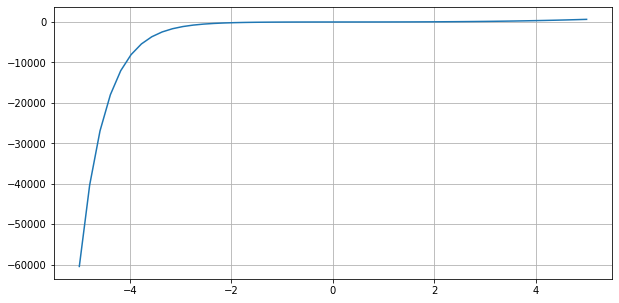

In [37]:
funcao_original = lambda x: 5*(x**3) + x**2 - np.exp(1 - 2*x) + np.cos(x) + 20
funcao_g = lambda x: (-x**2 + np.exp(1 - 2*x) + np.cos(x) + 20) / 5*(x**2)
funcao_derivada = lambda x: 15*(x**2) + 2*x + 2*np.exp(-2*x + 1) - np.sin(x)

x0 = -5
x1 = 5

plt.figure(figsize = (10,5))
x = np.linspace(-5, 5, 50)
plt.plot(x, funcao_original(x))
plt.grid()

In [38]:
%timeit opt.root_scalar(funcao_original, x0 = -5, x1 = 5, method = "secant");
opt.root_scalar(funcao_original, x0 = -5, x1 = 5, method = "secant")

1.33 ms ± 364 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


      converged: True
           flag: 'converged'
 function_calls: 24
     iterations: 23
           root: -0.9295604598378417

In [39]:
%timeit opt.root_scalar(funcao_original, bracket = [-5, 5], method = "bisect");
opt.root_scalar(funcao_original, bracket = [-5, 5], method = "bisect")

213 µs ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 45
     iterations: 43
           root: -0.9295604598389673

In [40]:
%timeit opt.fixed_point(funcao_g, x0 = -5);
opt.fixed_point(funcao_g, x0 = -5)

173 µs ± 18.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


array(-5.)

In [41]:
%timeit opt.root_scalar(funcao_original, fprime = funcao_derivada, x0 = -5, x1 = 5, method = "newton");
opt.root_scalar(funcao_original, fprime = funcao_derivada, x0 = -5, x1 = 5, method = "newton")

667 µs ± 38.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 26
     iterations: 13
           root: -0.9295604598378413

In [42]:
%timeit metodoFalsaPosicao(funcao_original, -5, 5);
metodoFalsaPosicao(funcao_original, -5, 5)

6.59 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


(4.788516539612482,      a         b         x      Erro
 0 -5.0  5.000000  4.890341  1.000000
 1 -5.0  4.890341  4.788517  2.022424)

<center class="alert alert-block alert-info"><strong>$f_4 = sin(x)x + 4, com $ $x^*$ pertencente $[1,5]$</strong></center>

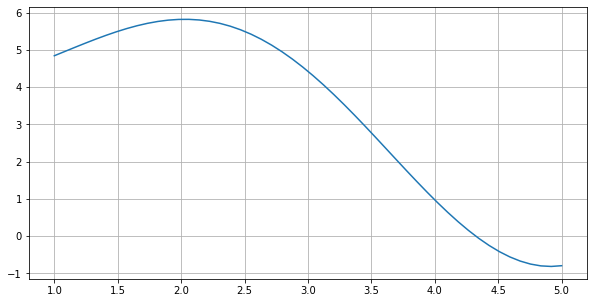

In [43]:
funcao_original = lambda x: np.sin(x)*x + 4
funcao_g = lambda x: -4/np.sin(x)
funcao_derivada = lambda x: x*np.cos(x) + np.sin(x)

x0 = 1
x1 = 5

plt.figure(figsize = (10,5))
x = np.linspace(1, 5, 50)
plt.plot(x, funcao_original(x))
plt.grid()

In [44]:
%timeit opt.root_scalar(funcao_original, x0 = 1, x1 = 5, method = "secant");
opt.root_scalar(funcao_original, x0 = 1, x1 = 5, method = "secant")

283 µs ± 5.41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 4.323239543713714

In [45]:
%timeit opt.root_scalar(funcao_original, bracket = [1, 5], method = "bisect");
opt.root_scalar(funcao_original, bracket = [1, 5], method = "bisect")

114 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 43
     iterations: 41
           root: 4.323239543713498

In [46]:
%timeit opt.fixed_point(funcao_g, x0 = 1);
opt.fixed_point(funcao_g, x0 = 1);

834 µs ± 20.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [47]:
%timeit opt.root_scalar(funcao_original, fprime = funcao_derivada, x0 = 1, x1 = 5, method = "newton");
opt.root_scalar(funcao_original, fprime = funcao_derivada, x0 = 1, x1 = 5, method = "newton");

354 µs ± 33.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [48]:
%timeit metodoFalsaPosicao(funcao_original, 1, 5);
metodoFalsaPosicao(funcao_original, 1, 5)

6.3 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


(4.255984103856676,      a         b         x      Erro
 0  1.0  5.000000  4.436048  1.000000
 1  1.0  4.436048  4.255984  0.774574)

<center class="alert alert-block alert-info"><strong>$f_6 = x^{10} - 1, com $ $x^*$ pertencente $[0.8, 1.2]$</strong></center>

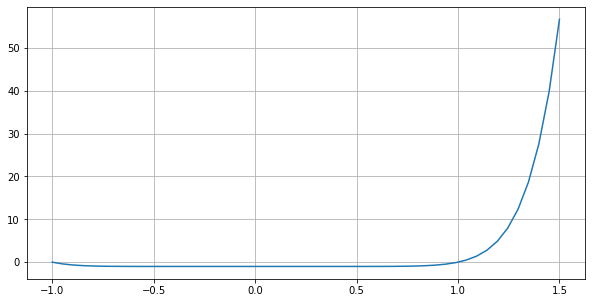

In [49]:
funcao_original = lambda x:  x**10 - 1
funcao_g = lambda x: 1/(x ** 9)
funcao_derivada = lambda x: 10*(x**9)

x0 = 0.8
x1 = 1.2

plt.figure(figsize = (10,5))
x = np.linspace(-1, 1.5, 50)
plt.plot(x, funcao_original(x))
plt.grid()

In [50]:
%timeit opt.root_scalar(funcao_original, x0 = 0.8, x1 = 1.2, method = "secant");
opt.root_scalar(funcao_original, x0 = 0.8, x1 = 1.2, method = "secant");

379 µs ± 29.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
%timeit opt.root_scalar(funcao_original, bracket = [0.8, 1.2], method = "bisect");
opt.root_scalar(funcao_original, bracket = [0.8, 1.2], method = "bisect");

13.3 µs ± 1.78 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [52]:
%timeit opt.fixed_point(funcao_g, x0 = 0.8);
opt.fixed_point(funcao_g, x0 = 0.8);

398 µs ± 55.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [53]:
%timeit opt.root_scalar(funcao_original, fprime = funcao_derivada, x0 = 0.8, x1 = 1.2, method = "newton");
opt.root_scalar(funcao_original, fprime = funcao_derivada, x0 = 0.8, x1 = 1.2, method = "newton")

419 µs ± 63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 20
     iterations: 10
           root: 1.0

In [54]:
%timeit metodoFalsaPosicao(funcao_original, 0.8, 1.2);
metodoFalsaPosicao(funcao_original, 0.8, 1.1)

6.75 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


(0.9615779988555442,           a    b         x      Erro
 0  0.800000  1.1  0.907702  1.000000
 1  0.907702  1.1  0.961578  0.118654)